# Parameter Learning

We will discuss how to learn the parameters and structure of probabilistic models from data.

Readings : DMU 2.3, 2.4

In [1]:
using RDatasets
using PGFPlots
using Distributions
using CrossfilterCharts

## Maximum likelihood parameter learning

The Iris dataset was used in Fisher's classic 1936 paper, <a href="http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf" rel="nofollow">The Use of Multiple Measurements in Taxonomic Problems</a>. This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [2]:
D = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [3]:
dc(D)

CrossfilterCharts.DCOut(150×5 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species     │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ "setosa"    │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ "setosa"    │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ "setosa"    │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ "setosa"    │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ "setosa"    │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ "setosa"    │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ "setosa"    │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ "setosa"    │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ "setosa"    │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ "setosa"    │
│ 11  │ 5.4         │ 3.7        │ 1.5         │ 0.2        │ "setosa"    │
⋮
│ 139 │ 6.0         │ 3.0        │ 4.8         │ 1.8        │ "virginica" │
│ 140 │ 6.9         │ 3.1        │ 5.4         │ 2.1        │ "virginica" │
│ 141 │ 6.7         │ 3.1        │ 5.6         │ 2.4        │ "virginica" │
│ 142 │ 6.9         │ 3.1        │ 5.1         │ 2.3        │ "virginica" │
│ 143 │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ "virginica" │
│ 144 │ 6.8         │ 3.2        │ 5.9         │ 2.3        │ "virginica" │
│ 145 │ 6.7         │ 3.3        │ 5.7         │ 2.5        │ "virginica" │
│ 146 │ 6.7         │ 3.0        │ 5.2         │ 2.3        │ "virginica" │
│ 147 │ 6.3         │ 2.5        │ 5.0         │ 1.9        │ "virginica" │
│ 148 │ 6.5         │ 3.0        │ 5.2         │ 2.0        │ "virginica" │
│ 149 │ 6.2         │ 3.4        │ 5.4         │ 2.3        │ "virginica" │
│ 150 │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ "virginica" │,CrossfilterCharts.Dimension[CrossfilterCharts.Dimension(:SepalLength,"function(d){return Math.round(d.SepalLength / 0.500000)*0.500000; }",0.5),CrossfilterCharts.Dimension(:SepalWidth,"function(d){return Math.round(d.SepalWidth / 0.100000)*0.100000; }",0.1),CrossfilterCharts.Dimension(:PetalLength,"function(d){return Math.round(d.PetalLength / 0.500000)*0.500000; }",0.5),CrossfilterCharts.Dimension(:PetalWidth,"function(d){return Math.round(d.PetalWidth / 0.100000)*0.100000; }",0.1),CrossfilterCharts.Dimension(:Species,"function(d){return d.Species; }",NaN)],CrossfilterCharts.Group[CrossfilterCharts.Group(CrossfilterCharts.Dimension(:SepalLength,"function(d){return Math.round(d.SepalLength / 0.500000)*0.500000; }",0.5),"SepalLength_sum","reduceSum(function(d){ return d.SepalLength; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:SepalWidth,"function(d){return Math.round(d.SepalWidth / 0.100000)*0.100000; }",0.1),"SepalWidth_sum","reduceSum(function(d){ return d.SepalWidth; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:PetalLength,"function(d){return Math.round(d.PetalLength / 0.500000)*0.500000; }",0.5),"PetalLength_sum","reduceSum(function(d){ return d.PetalLength; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:PetalWidth,"function(d){return Math.round(d.PetalWidth / 0.100000)*0.100000; }",0.1),"PetalWidth_sum","reduceSum(function(d){ return d.PetalWidth; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:Species,"function(d){return d.Species; }",NaN),"Species_count","reduceCount()")],CrossfilterCharts.DCChart[CrossfilterCharts.DCChart(CrossfilterCharts.Group(CrossfilterCharts.Dimension(:SepalLength,"function(d){return Math.round(d.SepalLength / 0.500000)*0.500000; }",0.5),"SepalLength_sum","reduceSum(function(d){ return d.SepalLength; })"),CrossfilterCharts.ChartType("barChart",CrossfilterCharts.Attribute[CrossfilterCharts.Attribute(:centerBar,"true"),CrossfilterCharts.Attribute(:gap,"")],CrossfilterCharts.ChartType[CrossfilterCharts.ChartType("NONE",CrossfilterCharts.At

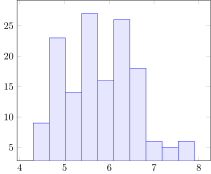

In [4]:
d = D[:SepalLength]
Plots.Histogram(d)

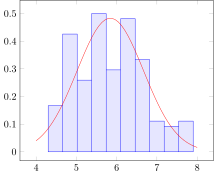

Distributions.Normal{Float64}(μ=5.843333333333335, σ=0.8253012917851409)

In [5]:
dist = fit_mle(Normal, d)
g = Axis([
    Plots.Histogram(d, density=true),
    Plots.Linear(x->pdf(dist,x), (4,8))
]
)
display(g)
display(dist)

## Bayesian parameter learning

A Bayesian Network is a graphical and condensed representation of a joint probability distribution. Each node in the network represents a random variable. Each directed edge indicates a relationship between nodes. Note that cycles are prohibited in Bayesian Networks.

Bayesian Networks reduce the number of independent parameters we need to represent a joint distribution.

In [6]:
# small helper function for plotting Beta distributions
PGFPlots.plot(d::Beta) = plot(x->pdf(d, x), (0,1));

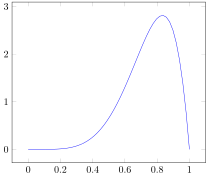

In [7]:
prior = Beta(6,2)
plot(prior)

In [8]:
prior

Distributions.Beta{Float64}(α=6.0, β=2.0)

In [9]:
posterior(d::Beta, x) = Beta(d.α + sum(x .== 1), d.β + sum(x .== 0))

posterior (generic function with 1 method)

In [10]:
# The posterior function is provided by distributions.jl
post = posterior(prior, [0, 0, 1])

Distributions.Beta{Float64}(α=7.0, β=4.0)

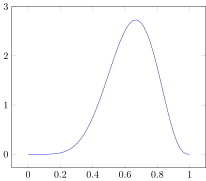

In [11]:
plot(post)

## Nonparametric parameter learning

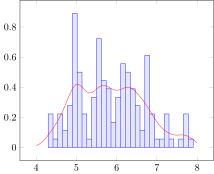

In [12]:
bandwith = 0.2
# kernel
K(x) = pdf(Normal(0,bandwith), x)
# nonparametric density function
p(x) = sum([K(x - o) for o in d])/length(d)
# plot result, comparing with histogram
g = Axis([
    Plots.Histogram(d, density=true, bins=30),
    Plots.Linear(p, (4,8))
])

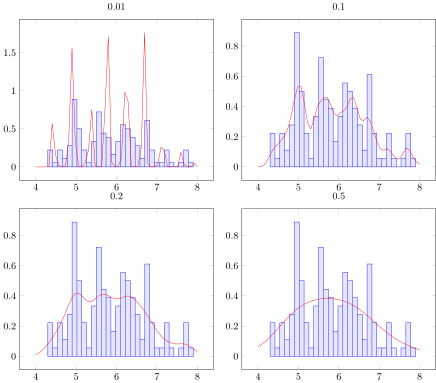

In [13]:
bandwidths = [0.01, 0.1, 0.2, 0.5]
gp = GroupPlot(2,2)
for bandwidth in bandwidths
    # kernel
    K₂(x) = pdf(Normal(0,bandwidth), x)
    # nonparametric density function
    p₂(x) = sum([K₂(x - o) for o in d])/length(d)
    # plot result, comparing with histogram
    g = Axis([
        Plots.Histogram(d, density=true, bins=30),
        Plots.Linear(p₂, (4,8))
        ], title = bandwidth)
    push!(gp, g)
end
gp

# Structure Learning

In [14]:
using BayesNets

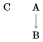

In [15]:
b = DiscreteBayesNet()
push!(b, DiscreteCPD(:A, [0.5,0.5]))
push!(b, DiscreteCPD(:B, [:A], [2], [Categorical([0.5,0.5]), Categorical([0.45,0.55])]))
push!(b, CategoricalCPD(:C, Categorical([0.5,0.5])))

In [16]:
d = rand(b, 5)

,C,A,B
1,2,1,2
2,2,1,1
3,1,2,2
4,1,1,1
5,1,1,1


In [17]:
count(b, d)

3-element Array{DataFrames.DataFrame,1}:
 2×2 DataFrames.DataFrame
│ Row │ C │ count │
├─────┼───┼───────┤
│ 1   │ 2 │ 2     │
│ 2   │ 1 │ 3     │                                        
 2×2 DataFrames.DataFrame
│ Row │ A │ count │
├─────┼───┼───────┤
│ 1   │ 1 │ 4     │
│ 2   │ 2 │ 1     │                                        
 3×3 DataFrames.DataFrame
│ Row │ A │ B │ count │
├─────┼───┼───┼───────┤
│ 1   │ 1 │ 2 │ 1     │
│ 2   │ 1 │ 1 │ 3     │
│ 3   │ 2 │ 2 │ 1     │

In [18]:
prior = UniformPrior()

  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/tim/.julia/v0.5/BayesNets/src/io.jl
  likely near /home/tim/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/tim/.julia/v0.5/BayesNets/src/io.jl


BayesNets.UniformPrior(1.0)

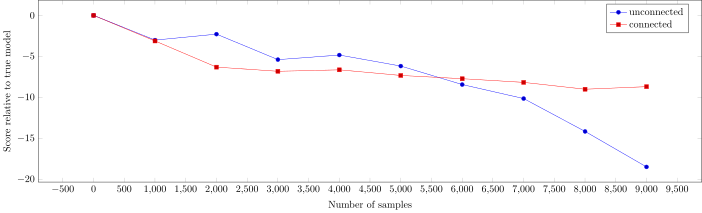

In [19]:
srand(0)

# generate a lot of data
d = rand(b, 10000);

sample_sizes = collect(1:1000:size(d,1))

# unconnected
bUnconnected = fit(DiscreteBayesNet, d, tuple())
scoreUnconnected = Float64[bayesian_score(bUnconnected, d[1:i,:], prior) for i in sample_sizes]

# fully connected
bConnected = fit(DiscreteBayesNet, d, (:A=>:B, :A=>:C, :B=>:C))
scoreConnected = Float64[bayesian_score(bConnected, d[1:i,:], prior) for i in sample_sizes]

# true
scoreTrue = Float64[bayesian_score(b, d[1:i,:], prior) for i in sample_sizes]

# plot
Axis(Plots.Plot[
    Plots.Linear(sample_sizes, scoreUnconnected - scoreTrue, legendentry="unconnected"),
    Plots.Linear(sample_sizes, scoreConnected - scoreTrue, legendentry="connected")
    ], xlabel="Number of samples", ylabel="Score relative to true model", width="25cm", height="8cm")

# Inference

Developing a probability distribution for a hidden (query) variable given a set of observations.

In [20]:
using Distributions
using PGFPlots
using BayesNets

## Inference for Classification

In [21]:
# Set uniform prior over Class
b = BayesNet()
push!(b, StaticCPD(:Class, NamedCategorical(["bird", "aircraft"], [0.5, 0.5])))

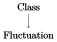

In [22]:
fluctuationStates = ["low", "hi"]
fluctuationDistributions(a::Assignment) = a[:Class] == "bird" ? NamedCategorical(fluctuationStates, [0.1, 0.9]) : 
                                                                NamedCategorical(fluctuationStates, [0.9, 0.1])
push!(b, FunctionalCPD{NamedCategorical}(:Fluctuation, [:Class], fluctuationDistributions))

In [23]:
# Function for plotting CPDs (don't worry about details here)
function plotCPD(cpd::CPD, range::Tuple{Real,Real}, assignments)
    convertAssignmentToString(a) = string(["$k = $v, " for (k,v) in a]...)[1:end-2]
    Axis(Plots.Plot[Plots.Linear(x->pdf(cpd(a), x), range, legendentry=convertAssignmentToString(a)) for a in assignments], width="25cm", height="8cm")
end;

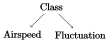

In [24]:
# if Bird, then Airspeed ~ N(45,10)
# if Aircraft, then Airspeed ~ N(100,40)
airspeedDistributions(a::Assignment) = a[:Class] == "bird" ? Normal(45,10) : Normal(100,40)
push!(b, FunctionalCPD{Normal}(:Airspeed, [:Class], airspeedDistributions))

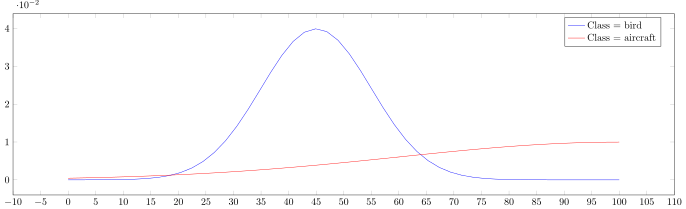

In [25]:
plotCPD(get(b, :Airspeed), (0., 100.), [Assignment(:Class=>c) for c in ["bird", "aircraft"]])

In [26]:
pb = pdf(b, :Class=>"bird", :Airspeed=>65, :Fluctuation=>"low")

0.00026995483256594033

In [27]:
pa = pdf(b, :Class=>"aircraft", :Airspeed=>65, :Fluctuation=>"low")# Probability of aircraft given data
pa / (pa + pb)

0.9189464435022358

In [28]:
# View (unnormalized) distribution as a vector
d = [pb, pa]

2-element Array{Float64,1}:
 0.000269955
 0.00306062 

In [29]:
# Now normalize
d / sum(d)

2-element Array{Float64,1}:
 0.0810536
 0.918946 